In [ ]:
# Below code is for getting figure in center alignment
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")

In [ ]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Reading excel file

In [ ]:
# Reading the given file and basic checks
df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls",index_col=0)
df

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3


# Statistical Info about data

In [ ]:
# Describing statistical information
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [ ]:
# getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, E1001000 to E100998
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfa

In [ ]:
# value counts checkin info for department 

print("Gender :",df.Gender.value_counts(),sep = '\n')
print("-"*40)
print("EmpDepartment :",df.EmpDepartment.value_counts(),sep = '\n')
print("-"*40)
print("PerformanceRating:",df.PerformanceRating.value_counts(),sep = '\n')
print("-"*40)

Gender :
Male      725
Female    475
Name: Gender, dtype: int64
----------------------------------------
EmpDepartment :
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64
----------------------------------------
PerformanceRating:
3    874
2    194
4    132
Name: PerformanceRating, dtype: int64
----------------------------------------


### checking for columns features 

In [ ]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## ordinal features

In [ ]:
ord_data = df[['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance']] = df[['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance']]
ord_data

,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpRelationshipSatisfaction,EmpWorkLifeBalance
EmpNumber,,,,,,,
E1001000,3,4,3,2,4,4,2
E1001006,4,4,3,2,1,4,3
E1001007,4,4,2,3,1,3,3
E1001009,4,2,2,5,4,2,2
E1001010,4,1,3,2,1,4,3
...,...,...,...,...,...,...,...
E100992,1,4,4,2,4,2,3
E100993,2,4,4,1,4,1,3
E100994,1,4,4,1,3,3,3


## numerical features

In [ ]:
num_data = df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
              'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
              'YearsWithCurrManager']]
num_data

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmpNumber,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0,8
E1001006,47,14,42,2,12,20,2,7,7,1,7
E1001007,40,5,48,5,21,20,2,18,13,1,12
E1001009,41,10,73,3,15,23,2,21,6,12,6
E1001010,60,16,84,8,14,10,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0,4
E100993,37,10,80,3,17,4,2,1,0,0,0
E100994,50,28,74,1,11,20,3,20,8,3,8


## Check for Normal Distribution
#### Checking weather the data is normally distributed or NOT

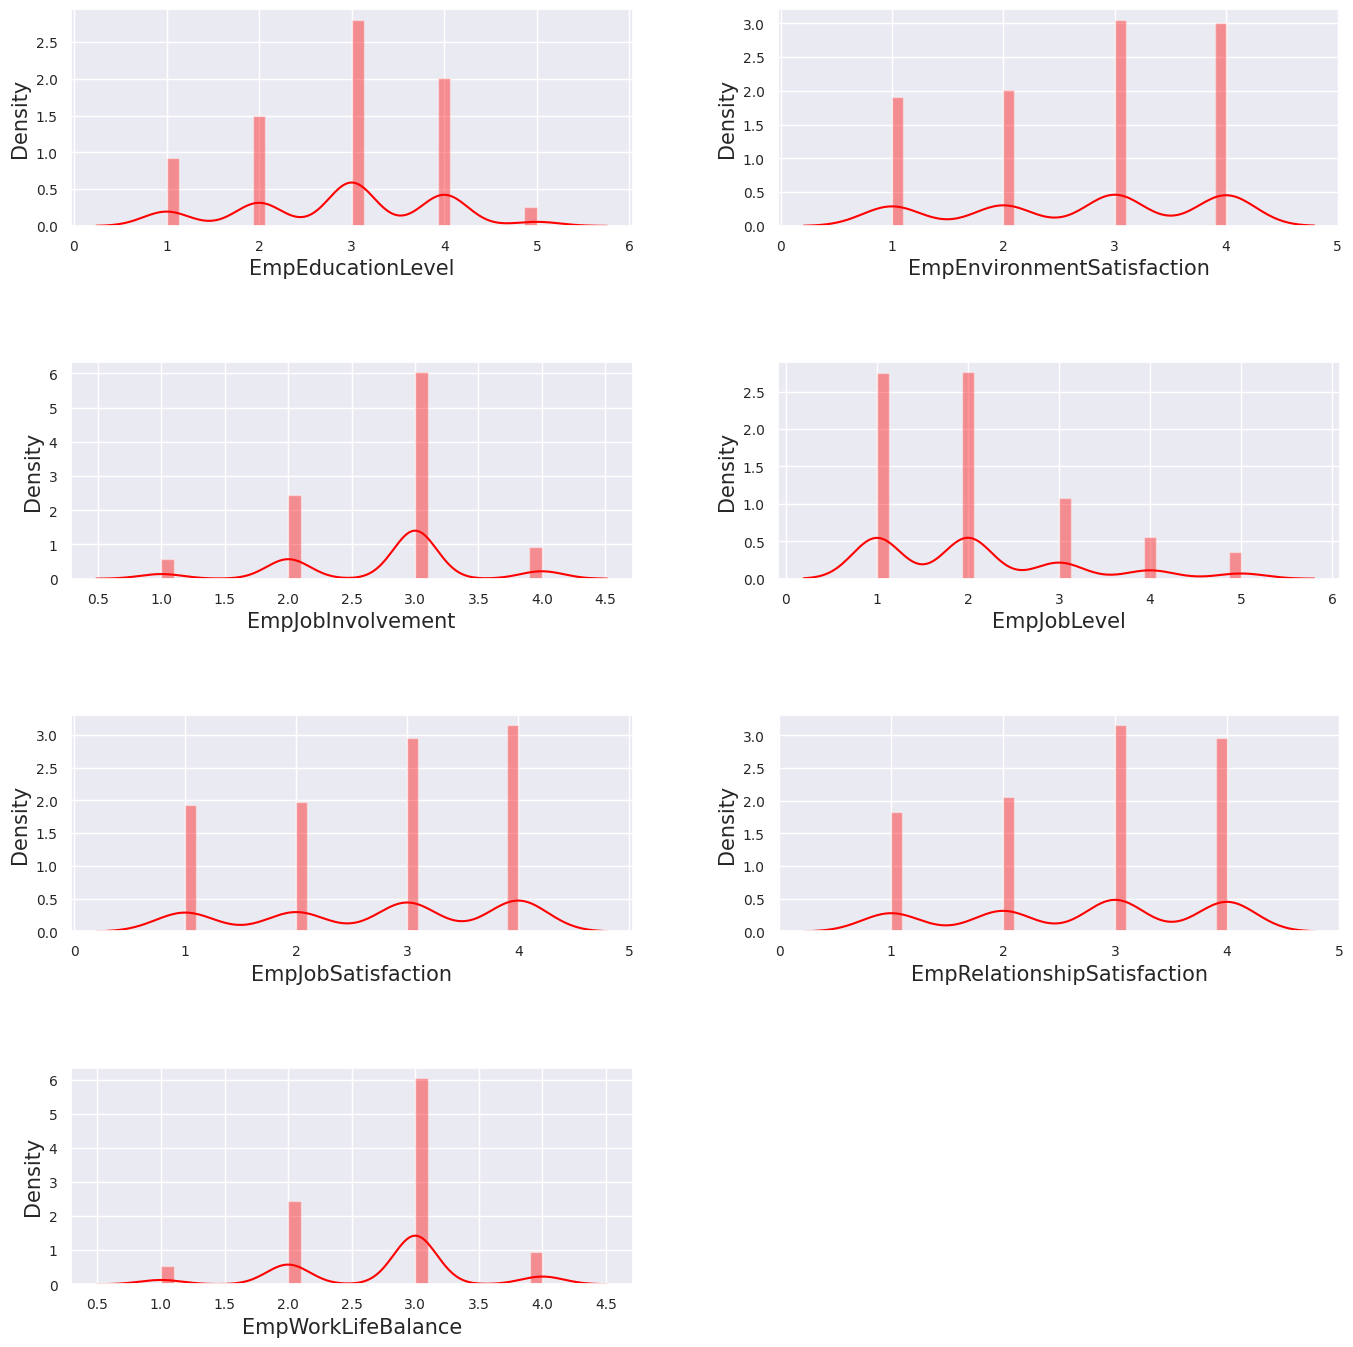

In [ ]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
            "legend.fontsize":8},style="darkgrid")
ord_cols=df.select_dtypes(exclude="object").copy()
fig = plt.figure(figsize=(15,25),dpi=100)
for index,col in enumerate(ord_data):
    plt.subplot(7,2,index+1)
    sns.distplot(ord_data.loc[:,col].dropna(),kde=True,bins=30,color="red")
fig.tight_layout(pad=4.0)

In [ ]:
# Defining a funition for checking  skewness
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

print(skewedness(num_data))
print('Range of skewness & kurtosis: S< |1.96|')
# Checking Kurtosis
print('skewness for YearsSinceLastPromotion:',skew(num_data.YearsSinceLastPromotion))
print('kurtosis for YearsSinceLastPromotion:',kurtosis(num_data.YearsSinceLastPromotion))

['YearsSinceLastPromotion']
Range of skewness & kurtosis: S< |1.96|
skewness for YearsSinceLastPromotion: 1.9724620367914252
kurtosis for YearsSinceLastPromotion: 3.5193552691799805


## Transforming Skewed Data for Machine Learning

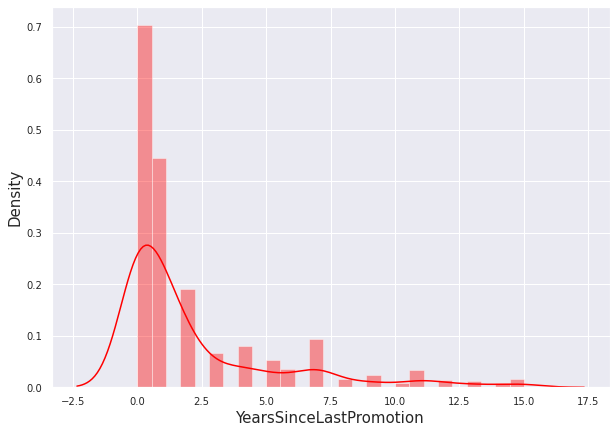

In [ ]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=10,7
#dist plot
sns.distplot(num_data['YearsSinceLastPromotion'],color="red")
plt.show()

### Square Root Transformation

In [ ]:
# applying square root to the skewed column
num_data['YearsSinceLastPromotion'] = np.sqrt(num_data['YearsSinceLastPromotion'])

In [ ]:
num_data['YearsSinceLastPromotion'].skew()

0.7350121906940618

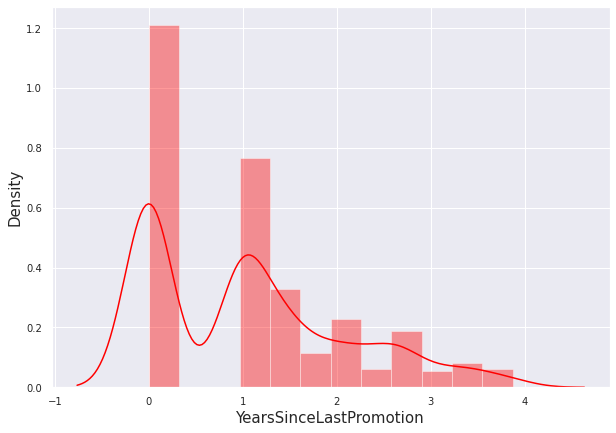

In [ ]:
# After transforming the data
plt.rcParams["figure.figsize"]=10,7
#dist plot
sns.distplot(num_data['YearsSinceLastPromotion'],color="red")
plt.show()

In [ ]:
num_data['YearsSinceLastPromotion']

EmpNumber
E1001000    0.000000
E1001006    1.000000
E1001007    1.000000
E1001009    3.464102
E1001010    1.414214
              ...   
E100992     0.000000
E100993     0.000000
E100994     1.732051
E100995     2.645751
E100998     1.414214
Name: YearsSinceLastPromotion, Length: 1200, dtype: float64

In [ ]:
# checking for skewed columns
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

print(skewedness(ord_data))

[]


## Ordinal features

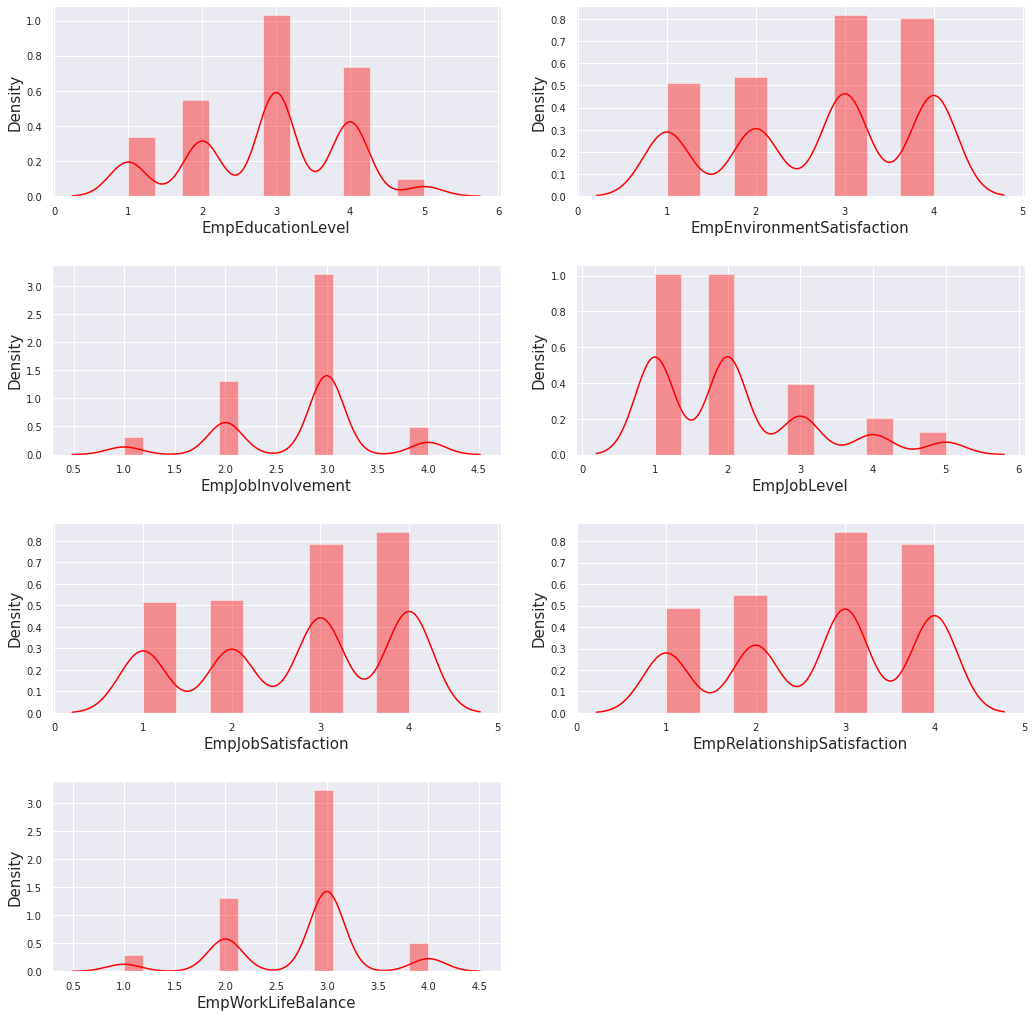

In [ ]:
 # Defing ordinal features

ord_data = df[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
'EmpRelationshipSatisfaction','EmpWorkLifeBalance']]
# figure size for the notebook
plt.figure(figsize=(15,25))
# Creating loop for ploting ordinal features
for index,cols in enumerate(ord_data):
    plt.subplot(7,2,index+1)
    sns.distplot(ord_data.loc[:,cols],color="red")
plt.tight_layout(pad=2)

## Categorical features

In [ ]:
# storing object type data in obj_data variable
obj_data = df.select_dtypes(include="object")
obj_data

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
EmpNumber,,,,,,,,
E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...
E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No


# Checking for Nan/ Null values

In [ ]:
# check for numerical data
num_data.isna().sum()

Age                             0
DistanceFromHome                0
EmpHourlyRate                   0
NumCompaniesWorked              0
EmpLastSalaryHikePercent        0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
dtype: int64

In [ ]:
# Check for ordianal data
ord_data.isna().sum()

EmpEducationLevel              0
EmpEnvironmentSatisfaction     0
EmpJobInvolvement              0
EmpJobLevel                    0
EmpJobSatisfaction             0
EmpRelationshipSatisfaction    0
EmpWorkLifeBalance             0
dtype: int64

In [ ]:
# Check for categorical data
obj_data.isna().sum()

Gender                     0
EducationBackground        0
MaritalStatus              0
EmpDepartment              0
EmpJobRole                 0
BusinessTravelFrequency    0
OverTime                   0
Attrition                  0
dtype: int64

In [ ]:
# combining numerical, ordinal & categorial features
final_df = pd.concat([num_data,ord_data,obj_data,df['PerformanceRating']], axis=1)
final_df

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,8,3,4,3,2,4,4,2,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
E1001006,47,14,42,2,12,20,2,7,7,1.000000,7,4,4,3,2,1,4,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
E1001007,40,5,48,5,21,20,2,18,13,1.000000,12,4,4,2,3,1,3,3,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No,4
E1001009,41,10,73,3,15,23,2,21,6,3.464102,6,4,2,2,5,4,2,2,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No,3
E1001010,60,16,84,8,14,10,1,2,2,1.414214,2,4,1,3,2,1,4,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,4,1,4,4,2,4,2,3,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No,4
E100993,37,10,80,3,17,4,2,1,0,0.000000,0,2,4,4,1,4,1,3,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No,3
E100994,50,28,74,1,11,20,3,20,8,1.732051,8,1,4,4,1,3,3,3,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No,3


# Checking Outliers


                                                  Checking Outlier in ordinal data                                                 



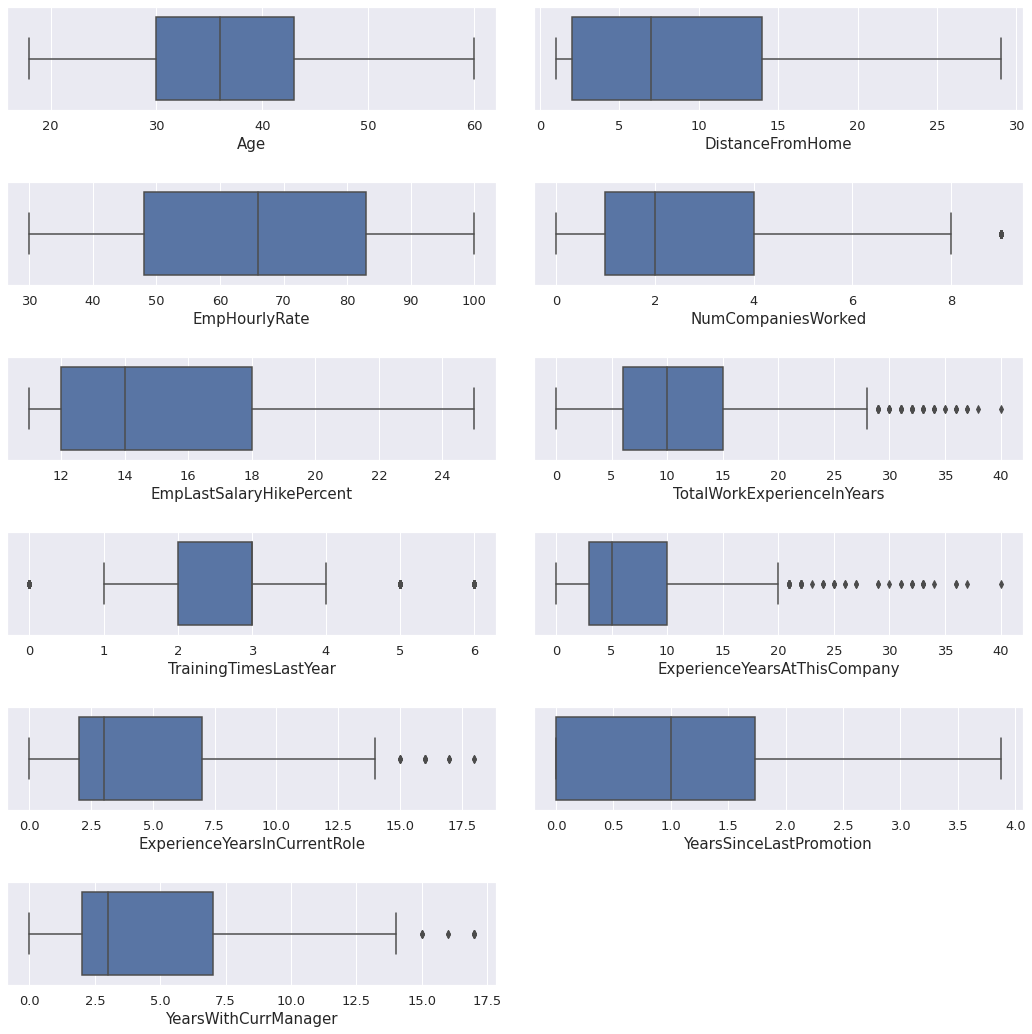

In [ ]:
sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":13,"ytick.labelsize":13,
            "legend.fontsize":12})
plt.figure(figsize=(15,15))

txt = "Checking Outlier in ordinal data"
x = txt.center(131)
print(f"\033[1m\n{x}\n")

for index,cols in enumerate(num_data):
    plt.subplot(6,2,index+1)
    sns.boxplot(num_data.loc[:,cols])
plt.tight_layout(pad=2)

These columns are having outliers:
* EmpEducationLevel
* EmpEnvironmentSatisfaction
* EmpJobInvolvement 
* EmpJobLevel
* EmpJobSatisfication
* EmpRelationshipSatisfaction
* EmpWorkLifeBalance 

In [ ]:
df.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Treatment on Outliers

#### EmpEducationLevel outlier

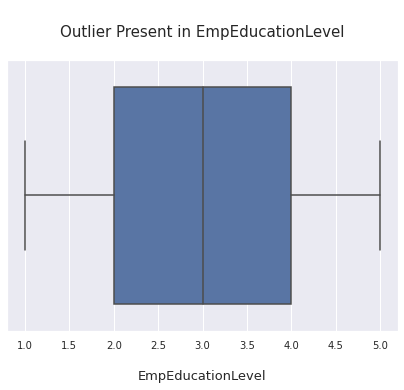

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpEducationLevel"])
plt.title("\nOutlier Present in EmpEducationLevel\n",fontsize=15)
plt.xlabel("\nEmpEducationLevel",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Outlier value present in EmpEducationLevel using Z-score method

In [ ]:
mean = np.mean(final_df["EmpEducationLevel"]) 
std = np.std(final_df["EmpEducationLevel"]) 
threshold = 3.5
outlier = [] 
for i in final_df["EmpEducationLevel"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('\033[1mOutlier in EmpEducationLevel  are ', outlier) 

Outlier in EmpEducationLevel  are  []


#### EmpEnvironmentSatisfaction outlier

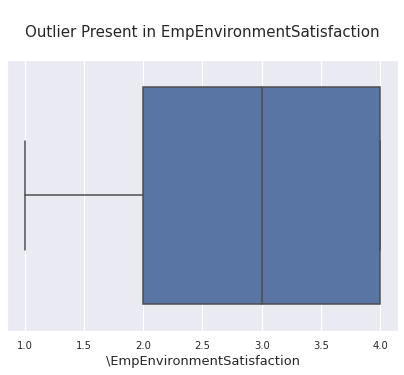

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpEnvironmentSatisfaction"])
plt.title("\nOutlier Present in EmpEnvironmentSatisfaction\n",fontsize=15)
plt.xlabel("\EmpEnvironmentSatisfaction",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Outlier value present in EmpEnvironmentSatisfaction using Z-score method

In [ ]:
mean = np.mean(final_df["EmpEnvironmentSatisfaction"]) 
std = np.std(final_df["EmpEnvironmentSatisfaction"]) 
threshold = 3.5
outlier = [] 
for i in final_df["EmpEnvironmentSatisfaction"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is []


#### Replace the outlier with proper value

In [ ]:
final_df["EmpEnvironmentSatisfaction"] = final_df["EmpEnvironmentSatisfaction"].replace([40],36)

#### After replacing the outlier with proper value in EmpEnvironmentSatisfaction

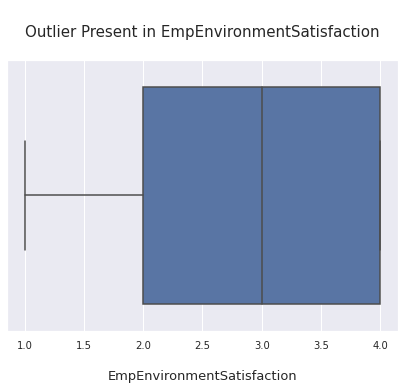

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpEnvironmentSatisfaction"])
plt.title("\nOutlier Present in EmpEnvironmentSatisfaction\n",fontsize=15)
plt.xlabel("\nEmpEnvironmentSatisfaction",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### EmpEducationLevel outlier
#### Outlier value present in EmpEducationLevel using Z-score method

In [ ]:
mean = np.mean(final_df["EmpEducationLevel"]) 
std = np.std(final_df["EmpEducationLevel"]) 
threshold = 3.5
outlier = [] 
for i in final_df["EmpEducationLevel"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


#### EmpWorkLifeBalance outlier

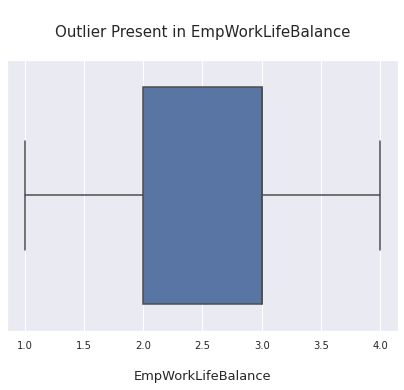

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpWorkLifeBalance"])
plt.title("\nOutlier Present in EmpWorkLifeBalance\n",fontsize=15)
plt.xlabel("\nEmpWorkLifeBalance",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Outlier value present in EmpWorkLifeBalance using Z-score method

In [ ]:
mean = np.mean(final_df["EmpWorkLifeBalance"]) 
std = np.std(final_df["EmpWorkLifeBalance"]) 
threshold = 3.5
outlier = [] 
for i in final_df["EmpWorkLifeBalance"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


#### Replace the outlier with proper value

In [ ]:
final_df["EmpWorkLifeBalance"] = final_df["EmpWorkLifeBalance"].replace([34, 31, 32, 33, 29, 33, 32, 33, 36, 30, 37, 40, 33, 33, 36, 29, 31, 32],27)

#### After replacing the outlier with proper value in EmpWorkLifeBalance

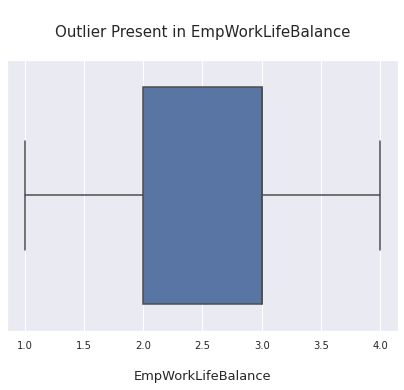

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpWorkLifeBalance"])
plt.title("\nOutlier Present in EmpWorkLifeBalance\n",fontsize=15)
plt.xlabel("\nEmpWorkLifeBalance",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### EmpEnvironmentSatisfaction outlier

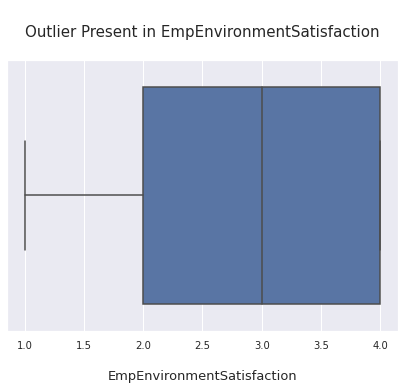

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpEnvironmentSatisfaction"])
plt.title("\nOutlier Present in EmpEnvironmentSatisfaction\n",fontsize=15)
plt.xlabel("\nEmpEnvironmentSatisfaction",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Outlier value present in ExperienceYearsInCurrentRole using Z-score method

In [ ]:
mean = np.mean(final_df["EmpEnvironmentSatisfaction"]) 
std = np.std(final_df["EmpEnvironmentSatisfaction"]) 
threshold = 3.5
outlier = [] 
for i in final_df["EmpEnvironmentSatisfaction"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


#### Replace the outlier with proper value

In [ ]:
final_df["EmpEnvironmentSatisfaction"] = final_df["EmpEnvironmentSatisfaction"].replace([17, 17, 18, 18, 17],15)

#### After replacing the outlier with proper EmpEnvironmentSatisfaction

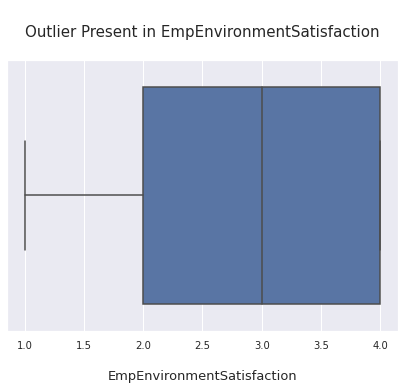

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpEnvironmentSatisfaction"])
plt.title("\nOutlier Present in EmpEnvironmentSatisfaction\n",fontsize=15)
plt.xlabel("\nEmpEnvironmentSatisfaction",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### EmpWorkLifeBalance outlier

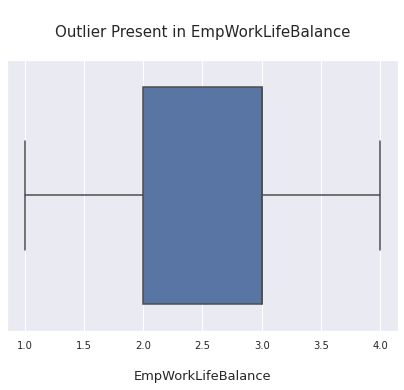

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpWorkLifeBalance"])
plt.title("\nOutlier Present in EmpWorkLifeBalance\n",fontsize=15)
plt.xlabel("\nEmpWorkLifeBalance",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

#### Outlier value present in EmpWorkLifeBalance using Z-score method

In [ ]:
mean = np.mean(final_df["EmpWorkLifeBalance"]) 
std = np.std(final_df["EmpWorkLifeBalance"]) 
threshold = 3.5
outlier = [] 
for i in final_df["EmpWorkLifeBalance"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


#### Replace the outlier with proper values

In [ ]:
final_df["EmpWorkLifeBalance"] = final_df["EmpWorkLifeBalance"].replace([17, 17, 17, 17, 17, 17],15)

#### After replacing the outlier with proper EmpWorkLifeBalance

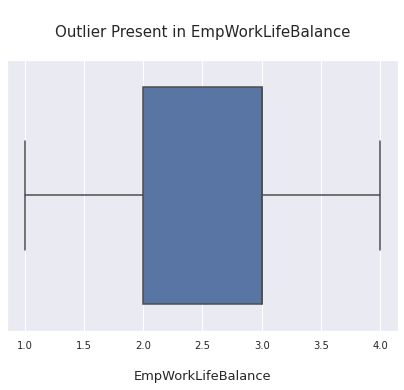

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style("darkgrid")
sns.boxplot(final_df["EmpWorkLifeBalance"])
plt.title("\nOutlier Present in EmpWorkLifeBalance\n",fontsize=15)
plt.xlabel("\nEmpWorkLifeBalance",fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [ ]:
ord_data.columns

Index(['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance'],
      dtype='object')

## Label Encoding
#### As object type data is not understand for the Ml Algorithm, so we have to encode object type data

In [ ]:
# Converting Labeled data to Numerical data using label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
final_df[['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']] = final_df[['Gender', 'EducationBackground', 
        'MaritalStatus', 'EmpDepartment','EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']].apply(label.fit_transform)

### After Encoding dataset:

In [ ]:
final_df

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,8,3,4,3,2,4,4,2,1,2,2,5,13,2,0,0,3
E1001006,47,14,42,2,12,20,2,7,7,1.000000,7,4,4,3,2,1,4,3,1,2,2,5,13,2,0,0,3
E1001007,40,5,48,5,21,20,2,18,13,1.000000,12,4,4,2,3,1,3,3,1,1,1,5,13,1,1,0,4
E1001009,41,10,73,3,15,23,2,21,6,3.464102,6,4,2,2,5,4,2,2,1,0,0,3,8,2,0,0,3
E1001010,60,16,84,8,14,10,1,2,2,1.414214,2,4,1,3,2,1,4,3,1,2,2,5,13,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,4,1,4,4,2,4,2,3,0,3,0,5,13,1,1,0,4
E100993,37,10,80,3,17,4,2,1,0,0.000000,0,2,4,4,1,4,1,3,1,1,2,1,15,2,0,0,3
E100994,50,28,74,1,11,20,3,20,8,1.732051,8,1,4,4,1,3,3,3,1,3,1,1,15,2,1,0,3


In [ ]:
# defing Independent variables as X
X = final_df.iloc[:,:-1]
# Defing Target variable or dependent variable
y = final_df.iloc[:,-1]
X

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
EmpNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,8,3,4,3,2,4,4,2,1,2,2,5,13,2,0,0
E1001006,47,14,42,2,12,20,2,7,7,1.000000,7,4,4,3,2,1,4,3,1,2,2,5,13,2,0,0
E1001007,40,5,48,5,21,20,2,18,13,1.000000,12,4,4,2,3,1,3,3,1,1,1,5,13,1,1,0
E1001009,41,10,73,3,15,23,2,21,6,3.464102,6,4,2,2,5,4,2,2,1,0,0,3,8,2,0,0
E1001010,60,16,84,8,14,10,1,2,2,1.414214,2,4,1,3,2,1,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,4,1,4,4,2,4,2,3,0,3,0,5,13,1,1,0
E100993,37,10,80,3,17,4,2,1,0,0.000000,0,2,4,4,1,4,1,3,1,1,2,1,15,2,0,0
E100994,50,28,74,1,11,20,3,20,8,1.732051,8,1,4,4,1,3,3,3,1,3,1,1,15,2,1,0


## Checking for Imbalance data

In [ ]:
y.value_counts(normalize=True)*100

3    72.833333
2    16.166667
4    11.000000
Name: PerformanceRating, dtype: float64

Our ML Algorithm learn more about <b> level 3</b> performance rating compare to <b>level 2</b> & <b>level 4</b>. It will lead biasing problem. So we have to balance the data

## Handling Imbalanced data
#### Converting Imbalance data into balanced data

* Balancing data with SMOTE Technique gives more number of NaN values
* so, we use RandomOverSampler Technique to balance the data

In [ ]:
# install imblearn for running Randomoversampler technique
#pip install imblearn # uncomment this line for installing imblearn package

In [ ]:
# Imports
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
# Intilizing the model
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_sample(X,y)
X_smote = pd.DataFrame(X_smote)
X_smote.columns = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition']
X_smote

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,EmpRelationshipSatisfaction,EmpWorkLifeBalance,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,32.0,10.0,55.0,1.0,12.0,10.0,2.0,10.0,7.0,0.000000,8.0,3.0,4.0,3.0,2.0,4.0,4.0,2.0,1.0,2.0,2.0,5.0,13.0,2.0,0.0,0.0
1,47.0,14.0,42.0,2.0,12.0,20.0,2.0,7.0,7.0,1.000000,7.0,4.0,4.0,3.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,5.0,13.0,2.0,0.0,0.0
2,40.0,5.0,48.0,5.0,21.0,20.0,2.0,18.0,13.0,1.000000,12.0,4.0,4.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,5.0,13.0,1.0,1.0,0.0
3,41.0,10.0,73.0,3.0,15.0,23.0,2.0,21.0,6.0,3.464102,6.0,4.0,2.0,2.0,5.0,4.0,2.0,2.0,1.0,0.0,0.0,3.0,8.0,2.0,0.0,0.0
4,60.0,16.0,84.0,8.0,14.0,10.0,1.0,2.0,2.0,1.414214,2.0,4.0,1.0,3.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,5.0,13.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,30.0,24.0,67.0,1.0,22.0,1.0,2.0,1.0,0.0,0.000000,0.0,1.0,4.0,3.0,1.0,3.0,2.0,3.0,1.0,1.0,0.0,1.0,15.0,2.0,0.0,0.0
2618,41.0,9.0,94.0,2.0,21.0,7.0,2.0,5.0,0.0,1.000000,4.0,4.0,3.0,3.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,0.0
2619,27.0,10.0,32.0,1.0,21.0,9.0,4.0,9.0,7.0,1.000000,7.0,2.0,4.0,3.0,3.0,1.0,3.0,2.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0
2620,22.0,7.0,75.0,1.0,23.0,1.0,2.0,1.0,0.0,0.000000,0.0,1.0,4.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,4.0,12.0,2.0,1.0,1.0


In [ ]:

y_smote= pd.DataFrame(y_smote)
y_smote.columns =["PerfomanceRating"]
y_smote.value_counts()

PerfomanceRating
4                   874
3                   874
2                   874
dtype: int64

Now, we can say our data is balanced

In [ ]:
# Again checking for Normal distribution in balanced data
from scipy.stats import skew
def skewedness(data):
    skewed=[]
    for i in data:
        sk=data[i].skew()
        if(sk>1.96 or sk<=-1.96):
            skewed.append(i)
    return skewed

skewedness(X_smote)


[]

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X_smote,y_smote)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

print(featurescores.nlargest(8,'Scores'))

                   feature_names       Scores
4       EmpLastSalaryHikePercent  1244.903600
7   ExperienceYearsAtThisCompany   536.105120
12    EmpEnvironmentSatisfaction   489.147842
8   ExperienceYearsInCurrentRole   455.218007
9        YearsSinceLastPromotion   400.485728
10          YearsWithCurrManager   388.361669
1               DistanceFromHome   179.684759
21                 EmpDepartment   161.352621


These are the <b> Top 10 </b> features which impact on the target variable to predict the rating

In [ ]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2622 non-null   float64
 1   DistanceFromHome              2622 non-null   float64
 2   EmpHourlyRate                 2622 non-null   float64
 3   NumCompaniesWorked            2622 non-null   float64
 4   EmpLastSalaryHikePercent      2622 non-null   float64
 5   TotalWorkExperienceInYears    2622 non-null   float64
 6   TrainingTimesLastYear         2622 non-null   float64
 7   ExperienceYearsAtThisCompany  2622 non-null   float64
 8   ExperienceYearsInCurrentRole  2622 non-null   float64
 9   YearsSinceLastPromotion       2622 non-null   float64
 10  YearsWithCurrManager          2622 non-null   float64
 11  EmpEducationLevel             2622 non-null   float64
 12  EmpEnvironmentSatisfaction    2622 non-null   float64
 13  Emp

In [ ]:
X_smote.columns

Index(['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
       'EmpWorkLifeBalance', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

### Feature selection Technique
#### Model training with selected features
* By passing<b> top 3  features</b> columns in x and performancerating (target column) as y 
* For Test data, Model is getting <b> Accuracy score: 90% </b>
* For Train data, Model is getting <b> Accuracy score: 93% </b>

#### Model fitting
* By passing <b>top 10  features </b>columns in x and performancerating (target column) as y 
* For Test data, Model is getting <b> Accuracy score: 96% </b>
* For Train data, Model is getting <b> Accuracy score: 100%</b>

## Defining Features & Target for ML algorithm

In [ ]:
X = X_smote.loc[:,['EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction','ExperienceYearsInCurrentRole','ExperienceYearsAtThisCompany','EmpJobRole','YearsSinceLastPromotion','YearsWithCurrManager','EmpDepartment','DistanceFromHome','TotalWorkExperienceInYears' ]] # features
y = y_smote # target

## Spliting the dataset for training and test model

In [ ]:
# spliting Train data and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.30)
# Checking shape for train data and test data
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((1835, 10), (787, 10), (1835, 1), (787, 1))

## ML Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initilize model
forest = RandomForestClassifier() # random forest with default parameters
forest.fit(X_train,y_train)
y_predict = forest.predict(X_test)
y_train.value_counts()

PerfomanceRating
3                   624
4                   615
2                   596
dtype: int64

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier()  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_predict)  

## Evalutation of Machine Learning Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"\033[1mAccuracy_score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))

Accuracy_score : 98.6 %

Classification Report

              precision    recall  f1-score   support

           2       0.97      1.00      0.98       278
           3       1.00      0.96      0.98       250
           4       0.99      1.00      1.00       259

    accuracy                           0.99       787
   macro avg       0.99      0.99      0.99       787
weighted avg       0.99      0.99      0.99       787



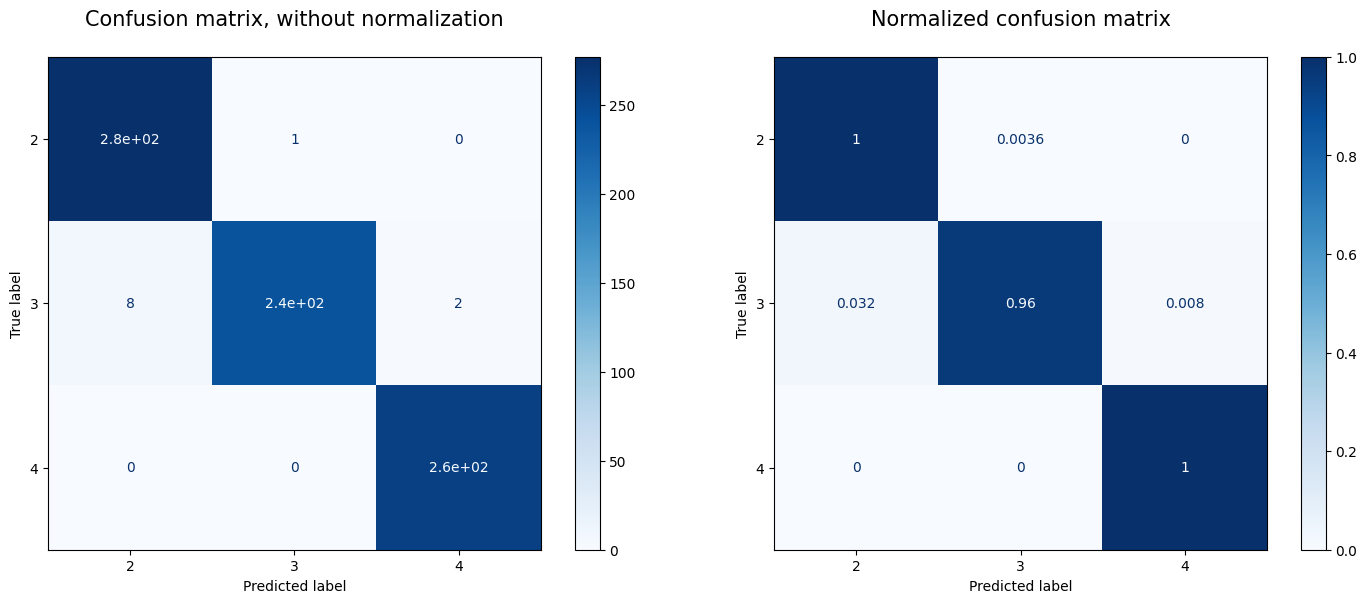

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib
# Default theame for plotings
matplotlib.rcdefaults()
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
# Plot non-normalized confusion matrix
cm1 = plot_confusion_matrix(forest, X_test, y_test, cmap=plt.cm.Blues,normalize=None,ax=ax1)
cm1.ax_.set_title("Confusion matrix, without normalization\n",fontsize=15)

cm2 = plot_confusion_matrix(forest, X_test, y_test, cmap=plt.cm.Blues,normalize="true",ax=ax2)
cm2.ax_.set_title("Normalized confusion matrix\n",fontsize=15)
plt.tight_layout(pad=2)

plt.show()

### checking Train accuracy to avoid overfitting problem

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_predict1 = forest.predict(X_train)

print(f"\033[1m Train - Accuracy score : {round(accuracy_score(y_train,y_predict1)*100,2)} %\n")
print(classification_report(y_train,y_predict1))

 Train - Accuracy score : 100.0 %

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       596
           3       1.00      1.00      1.00       624
           4       1.00      1.00      1.00       615

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X2=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y,random_state=42,test_size=0.30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_predict = forest.predict(X_test)


In [ ]:
y_train.value_counts()

PerfomanceRating
3                   624
4                   615
2                   596
dtype: int64

In [ ]:
#Get the accuracy on the training data
forest.score(X_train, y_train)

1.0

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))


Accuracy score : 98.35 %

Classification Report

              precision    recall  f1-score   support

           2       0.97      1.00      0.98       278
           3       1.00      0.95      0.97       250
           4       0.99      1.00      0.99       259

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787



After applying Feature scaling, we are getting same <b> Accuracy Score: 98%

In [ ]:
#pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
y_predict = xgbc.predict(X_test)



In [ ]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

print(xgbc)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss,auc
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy score : 94.92 %

Classification Report

              precision    recall  f1-score   support

           2       0.95      0.98      0.96       278
           3       0.91      0.94      0.92       250
           4       0.98      0.93      0.96       259

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [ ]:
xgbc.fit(X_train, y_train)
y__pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[277   1   0]
 [  8 239   3]
 [  0   0 259]]


## xgboost accuracy score 95% 

In [ ]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, xgbc.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[272   6   0]
 [ 12 234   4]
 [  2  16 241]]
Model Testing Accuracy = "0.9656488549618321!"

